# Estandarización de Heatmaps

In [6]:
from datetime import date
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


import predictivehp.processing.data_processing as dp
import predictivehp.models.models as models
import predictivehp.visualization.plotter as pltr

%config InlineBackend.figure_format = 'retina'
mpl.rcdefaults()
rc = {
    'figure.facecolor': 'black',
    'figure.figsize': (6.75, 4),  # Values for Jup. Lab // (6.0, 4.0) default

    'xtick.color': 'white',
    'xtick.major.size': 3,
    'xtick.top': False,
    'xtick.bottom': True,

    'ytick.color': 'white',
    'ytick.major.size': 3,
    'ytick.left': True,
    'ytick.right': False,

    'axes.facecolor': '#100000',
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'white',
    'axes.grid': True,
    'axes.axisbelow': True,

    'text.color': 'white',

    'legend.shadow': True,
    'legend.framealpha': 1.0,

    'grid.color': '#250000',
}
mpl.rcParams.update(rc)
f_size = mpl.rcParams.get('figure.figsize')

In [7]:
b_path = 'predictivehp/data'
s_shp_p = f'{b_path}/streets.shp'
c_shp_p = f'{b_path}/councils.shp'
cl_shp_p = f'{b_path}/citylimit.shp'

pp = dp.PreProcessing()
shps = pp.shps_processing(s_shp_p, c_shp_p, cl_shp_p)

In [8]:
rfr = models.RForestRegressor(data_0=None, shps=shps,
                              read_data=True, w_data=False,
                              read_X=True, w_X=False)

In [9]:
rfr.X.head()

Incidents_0                                                                                         Incidents_1                                                                                         Incidents_2                                                                                         Incidents_3                                                                                         Incidents_4                                                                                         Incidents_5                                                                                         Incidents_6                                                                                         Incidents_7                                                                                                                      geometry Dangerous Dangerous_pred
      2017-10-04 00:00:00 2017-10-11 00:00:00 2017-10-18 00:00:00 2017-10-25 00:00:00 2017-11-01 00:00:00 2017-10-04 00:00:00 2017-10-11 00:00:00 2017-10-18 00:00:00 2017-10-25 00:00:00 2017-11-01 00:00:00 2017-10-04 00:00:00 2017-10-11 00:00:00 2017-10-18 00:00:00 2017-10-25 00:00:00 2017-11-01 00:00:00 2017-10-04 00:00:00 2017-10-11 00:00:00 2017-10-18 00:00:00 2017-10-25 00:00:00 2017-11-01 00:00:00 2017-10-04 00:00:00 2017-10-11 00:00:00 2017-10-18 00:00:00 2017-10-25 00:00:00 2017-11-01 00:00:00 2017-10-04 00:00:00 2017-10-11 00:00:00 2017-10-18 00:00:00 2017-10-25 00:00:00 2017-11-01 00:00:00 2017-10-04 00:00:00 2017-10-11 00:00:00 2017-10-18 00:00:00 2017-10-25 00:00:00 2017-11-01 00:00:00 2017-10-04 00:00:00 2017-10-11 00:00:00 2017-10-18 00:00:00 2017-10-25 00:00:00 2017-11-01 00:00:00                                                                       
20695                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0  POINT (-10797988.46009712 3845236.298120889)         0       0.027002
21237                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0  POINT (-10797888.18396486 3845035.721801796)         0       0.027002
21238                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0 

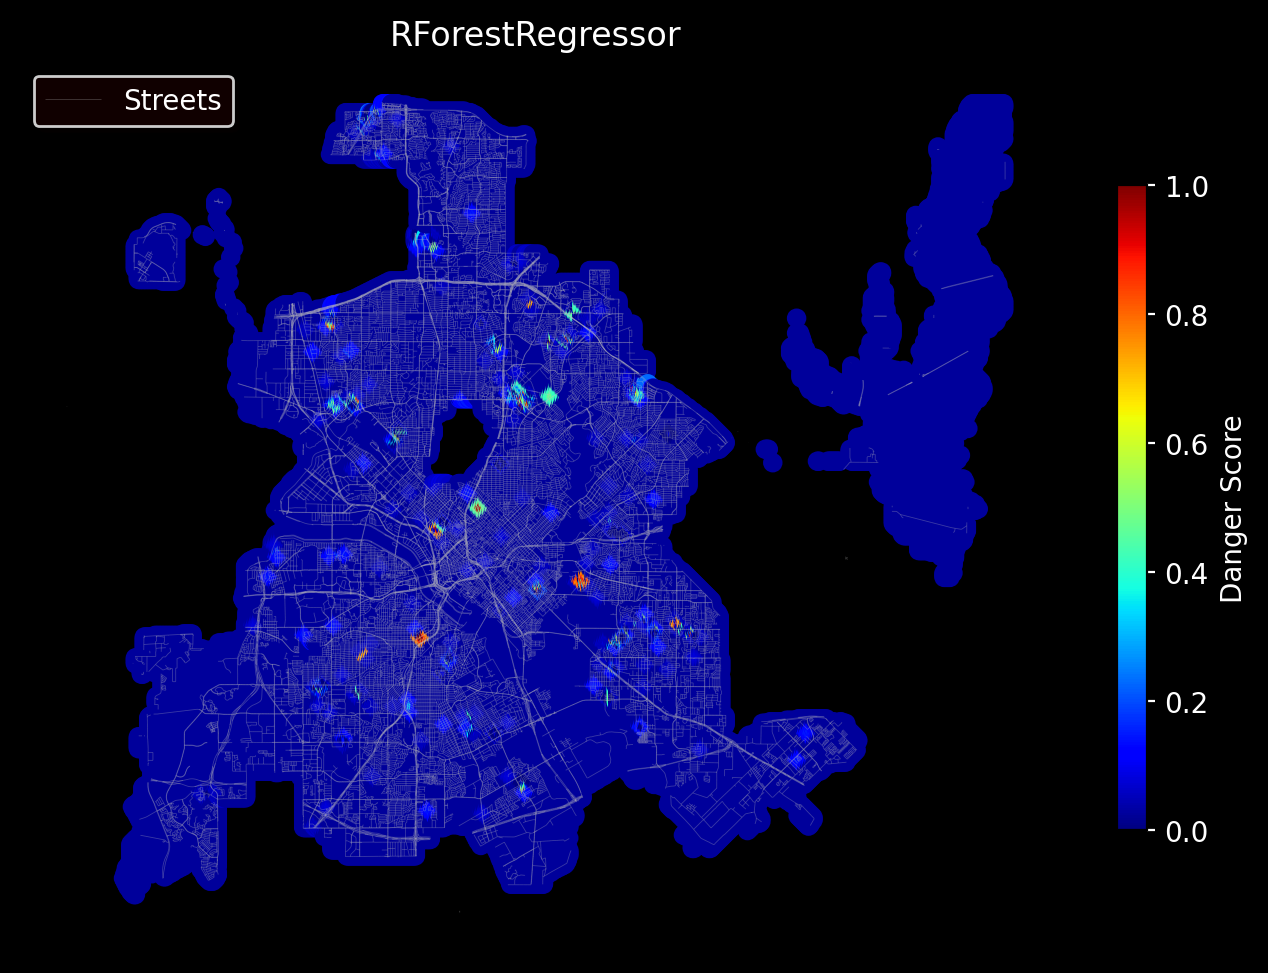

In [10]:
def heatmap(c=0):
    pred_points = rfr.X[[('geometry', ''), ('Dangerous_pred', '')]]
    pred_points = gpd.GeoDataFrame(pred_points)
    pred_points = pred_points[pred_points[('Dangerous_pred', '')] >= c]
    d_streets = rfr.shps['streets']

    fig, ax = plt.subplots(figsize=[f_size[0]] * 2)
    d_streets.plot(ax=ax, alpha=0.3, lw=0.3, color="silver", label="Streets")
    pred_points.plot(ax=ax, column=('Dangerous_pred', ''), cmap='jet')

    ax.set_axis_off()
    plt.title('RForestRegressor')
    plt.legend()

    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    cmap = mpl.cm.jet
    mappable = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    divider = make_axes_locatable(ax)
    c_bar = fig.colorbar(mappable, ax=ax,
                         fraction=0.15,
                         shrink=0.5,
                         aspect=21.5)
    c_bar.ax.set_ylabel('Danger Score')

    plt.tight_layout()
    plt.show()


heatmap()